In [3]:

import cv2

""" 
gstreamer_pipeline returns a GStreamer pipeline for capturing from the CSI camera
Flip the image by setting the flip_method (most common values: 0 and 2)
display_width and display_height determine the size of each camera pane in the window on the screen
Default 1920x1080 displayd in a 1/4 size window
"""

def gstreamer_pipeline(
    sensor_id=0,
    capture_width=320,
    capture_height=240,
    display_width=320,
    display_height=240,
    framerate=30,
    flip_method=0,
):
    return (
        "nvarguscamerasrc sensor-id=%d !"
        "video/x-raw(memory:NVMM), width=(int)%d, height=(int)%d, framerate=(fraction)%d/1 ! "
        "nvvidconv flip-method=%d ! "
        "video/x-raw, width=(int)%d, height=(int)%d, format=(string)BGRx ! "
        "videoconvert ! "
        "video/x-raw, format=(string)BGR ! appsink"
        % (
            sensor_id,
            capture_width,
            capture_height,
            framerate,
            flip_method,
            display_width,
            display_height,
        )
    )


def show_camera():
    window_title = "CSI Camera"

    # To flip the image, modify the flip_method parameter (0 and 2 are the most common)
    print(gstreamer_pipeline(flip_method=0))
    video_capture = cv2.VideoCapture(gstreamer_pipeline(flip_method=0), cv2.CAP_GSTREAMER)
    if video_capture.isOpened():
        try:
            window_handle = cv2.namedWindow(window_title, cv2.WINDOW_AUTOSIZE)
            while True:
                ret_val, frame = video_capture.read()
                # Check to see if the user closed the window
                # Under GTK+ (Jetson Default), WND_PROP_VISIBLE does not work correctly. Under Qt it does
                # GTK - Substitute WND_PROP_AUTOSIZE to detect if window has been closed by user
                if cv2.getWindowProperty(window_title, cv2.WND_PROP_AUTOSIZE) >= 0:
                    cv2.imshow(window_title, frame)
                else:
                    break 
                keyCode = cv2.waitKey(10) & 0xFF
                # Stop the program on the ESC key or 'q'
                if keyCode == 27 or keyCode == ord('q'):
                    break
        finally:
            video_capture.release()
            cv2.destroyAllWindows()
    else:
        print("Error: Unable to open camera")


ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

GST_ARGUS: Creating output stream
CONSUMER: Waiting until producer is connected...
GST_ARGUS: Available Sensor modes :
GST_ARGUS: 3264 x 2464 FR = 21.000000 fps Duration = 47619048 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 3264 x 1848 FR = 28.000001 fps Duration = 35714284 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1920 x 1080 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1640 x 1232 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 59.999999 fps Duration = 16666667 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 120.000005 fps Duration = 8333333 ; Analog Gain range min 1.000000, max 10.625000; Exposur

[ WARN:1] global /opt/opencv/modules/videoio/src/cap_gstreamer.cpp (935) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


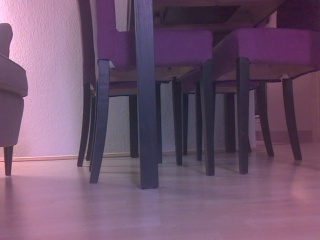

e Range min 13000, max 683709000;

GST_ARGUS: Running with following settings:
   Camera index = 0 
   Camera mode  = 5 
   Output Stream W = 1280 H = 720 
   seconds to Run    = 0 
   Frame Rate = 120.000005 
GST_ARGUS: Setup Complete, Starting captures for 0 seconds
GST_ARGUS: Starting repeat capture requests.
CONSUMER: Producer has connected; continuing.


In [4]:

import cv2
import numpy as np
from IPython.display import display, Image
import ipywidgets as widgets
import threading
# Stop button
# ================
stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square' # (FontAwesome names without the `fa-` prefix)
)


# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(gstreamer_pipeline(flip_method=6), cv2.CAP_GSTREAMER)
    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

In [5]:
import jupyros as jr
import rospy
from std_msgs.msg import String
from geometry_msgs.msg import Twist
import json
rospy.init_node('jupyter_node')
twist = Twist()
twist.linear.x = 0.1
twist.angular.z = -0.2
pub = rospy.Publisher('/cmd_vel', Twist, queue_size=10)
# pub.rate(10)
# print(twist)
# print(print(jr.publish.__code__))
jr.publish('/cmd_vel', Twist)
# pub.publish(twist)
